<a href="https://colab.research.google.com/github/wooi-haw/cats_and_dogs_classification/blob/main/cnn_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of five fruits with transfer learning
##In this example, we are going to train a CNN model with transfer learning for the classfication of five fruits

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Extract dataset from Google Drive
!cd /content/
!unzip /content/drive/MyDrive/fruits_dataset

Streaming output truncated to the last 5000 lines.
  inflating: Fruits Classification/train/Grape/Grape (1950).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1952).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1953).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1955).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1956).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1957).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1958).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1959).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (196).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1960).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1961).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1962).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1963).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1964).jpeg  
  inflating:

In [3]:
# Load modules
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Setup training images and testing images
train_dir = 'Fruits Classification/train/'
test_dir = 'Fruits Classification/test/'
val_dir = 'Fruits Classification/valid/'

train_datagen = ImageDataGenerator(
                    rescale=1/255.,
                    rotation_range=30,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    batch_size=32,
                    target_size=(150,150),
                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    batch_size=32,
                    target_size=(150,150),
                    class_mode='categorical',
                    shuffle=False)

val_generator = val_datagen.flow_from_directory(
                    val_dir,
                    batch_size=32,
                    target_size=(150,150),
                    class_mode='categorical',
                    shuffle=False)

Found 9700 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [4]:
# Import the inception mode, do not include the fully-connected layer at the top as the last layer of the network
base_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Make all the layers in the pre-trained model non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Print the model summary
base_model.summary()

last_layer = base_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Applies average pooling on the spatial dimensions until each spatial dimension is one
x = GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = Dense(5, activation='softmax')(x)

model = Model(base_model.input, x)

model.compile(optimizer ='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

model.summary()

history = model.fit(train_generator,
                    steps_per_epoch=304,
                    epochs=3,
                    validation_data=test_generator,
                    validation_steps=7,
                    verbose=1)

87910968/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

304/304 [==============================] - 80s 228ms/step - loss: 0.7919 - acc: 0.7045 - val_loss: 0.4761 - val_acc: 0.8300
Epoch 2/3
304/304 [==============================] - 65s 214ms/step - loss: 0.5975 - acc: 0.7815
Epoch 3/3
304/304 [==============================] - 65s 213ms/step - loss: 0.5473 - acc: 0.8019


In [5]:
scores = model.evaluate(test_generator)
print(f"{model.metrics_names[0]}: {scores[0]:.2f}")
print(f"{model.metrics_names[1]}: {scores[1]:.2%}")

4/4 [==============================] - 0s 37ms/step - loss: 0.3610 - acc: 0.8800
loss: 0.36
acc: 88.00%


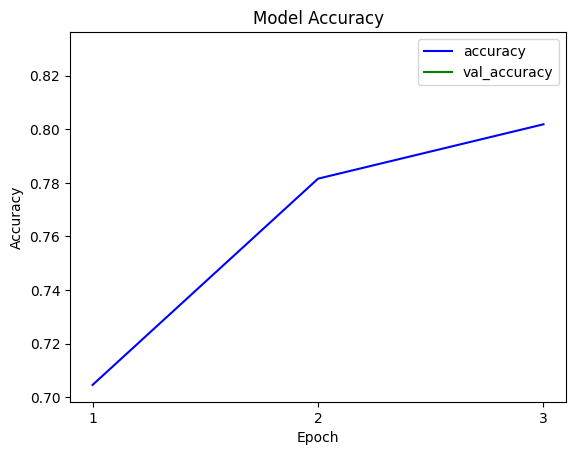

In [6]:
# Plot model accuracy and lose
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(np.arange(1, len(acc) + 1), acc, 'b', label='accuracy')
plt.plot(np.arange(1, len(val_acc) + 1), val_acc, 'g', label='val_accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(acc) + 1))
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc=0)
plt.show()

4/4 [==============================] - 1s 52ms/step


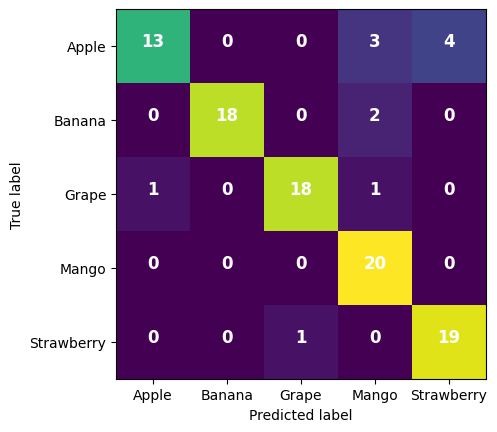

In [7]:
# Show the confusion matrix
pred = model.predict(test_generator)
y_pred = np.argmax(pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('default')
fig = plt.figure()
ax = plt.gca()
im = ax.matshow(cm)
for i, j in enumerate(cm.ravel()):
    ax.text(i%5, i//5, f'{j}', color='w', size='large', weight='bold', ha='center')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(list(train_generator.class_indices))
ax.set_yticks(np.arange(5))
ax.set_yticklabels(list(train_generator.class_indices))
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [8]:
# List files that were missclassified
p = test_generator.classes != y_pred
file_errors = [test_generator.filenames[i] for i, j in enumerate(p) if j]
print(file_errors)

['Apple/Apple (1153).jpeg', 'Apple/Apple (12).png', 'Apple/Apple (1415).jpeg', 'Apple/Apple (1555).jpeg', 'Apple/Apple (1624).jpeg', 'Apple/Apple (1809).jpeg', 'Apple/Apple (27).jpeg', 'Banana/Banana (2067).jpeg', 'Banana/Banana (2928).jpeg', 'Grape/Grape (1656).jpeg', 'Grape/Grape (387).jpeg', 'Strawberry/Strawberry (1725).jpeg']


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model2.json", "w") as json_file:
  json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2.h5")
print("Saved model to disk")

from json import dump
with open('class_indices2.json', 'w') as f:
  dump(train_generator.class_indices, f)

In [ ]:
# Test the trained model on a new image
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from json import load
import numpy as np

# load json and create model
json_file = open('model2.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# load weights into new model
model.load_weights("model2.h5")

# load class indices
with open('class_indices2.json', 'r') as f:
    class_indices = load(f)
print("Model loaded from disk")
map2class = {class_indices[k]:k for k in class_indices}